In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from pickle import load
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from model.nns import *
from model.bls import BroadLearningSystem
from model.elm import ELMRegressor, GenELMRegressor
from model.random_layer import RandomLayer, MLPRandomLayer, RBFRandomLayer, GRBFRandomLayer
from model.pyESN import ESN
from evaluation import *# metric_calculation, pred_bls_elm, pred_esn, load_model_config
from sklearn.manifold import TSNE


%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=6

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=6


In [3]:
%matplotlib inline
rcParams["figure.subplot.wspace"] = 0.05
rcParams["figure.subplot.hspace"] = 0.15
rcParams["figure.titlesize"] = 'xx-large'
rcParams["figure.titleweight"] = 'bold'
rcParams['axes.titlesize'] = 'xx-large'
rcParams['axes.titleweight'] = 'bold'
rcParams['axes.labelsize'] = 'xx-large'
rcParams['axes.labelweight'] = 'bold'
rcParams["ytick.labelsize"] = 'xx-large'
rcParams["xtick.labelsize"] = 'xx-large'
rcParams["axes.xmargin"] = 0.05

### Evaluation


FileNotFoundError: [Errno 2] No such file or directory: 'results/informer/lorenz_ftM_sl100_ll10_pl200_dm512_nh8_el3_dl2_df2048_atprob_fc3_ebtimeF_dtTrue_mxTrue_test_0/true.npy'

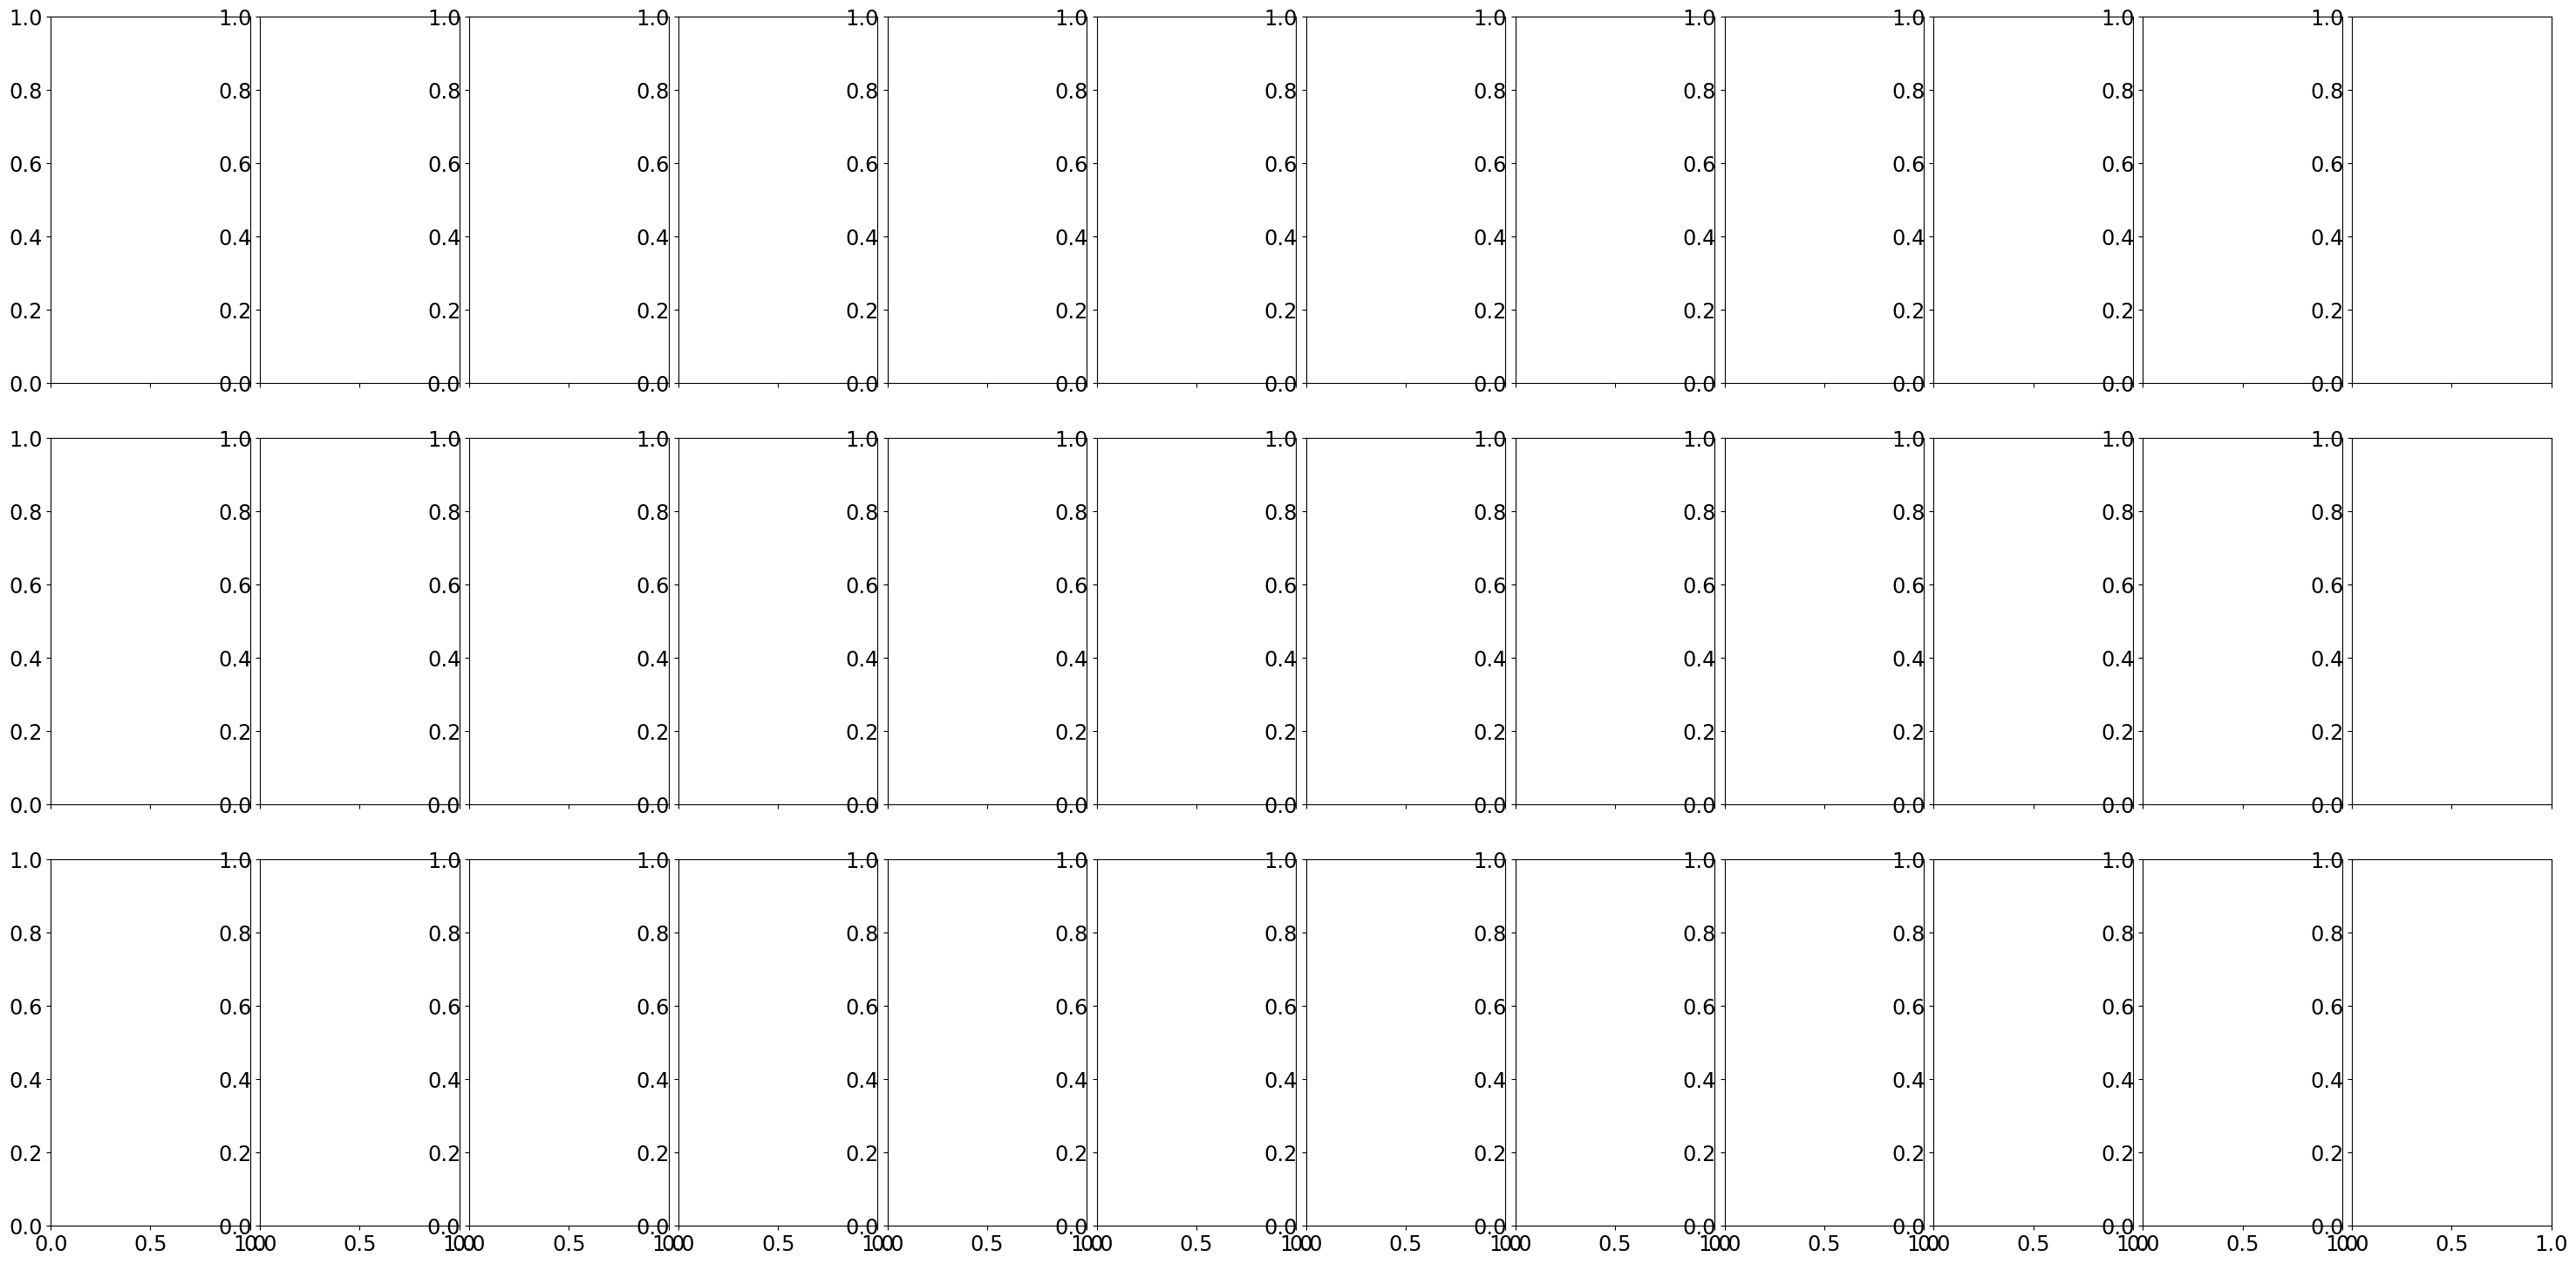

In [4]:
results = plot_comparison(
    "all",
    figsize=(37, 18),
    fontsize=30,
    linewidth=5,
    anchor=(0, -0.08, 1, 1),
    legsize=25,
)
display(results)